In [1]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
start = '2012-01-01'
end = '2022-12-31'
stock= 'GOOG'
data=yf.download(stock,start,end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)

In [4]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.495001,16.562924,16.171749,16.185880,147611217
1,2012-01-04,16.566147,16.614982,16.376262,16.485582,114989399
2,2012-01-05,16.336349,16.459304,16.267435,16.413692,131808205
3,2012-01-06,16.113497,16.360893,16.107794,16.339821,108119746
4,2012-01-09,15.430305,16.038633,15.399813,16.026237,233776981
...,...,...,...,...,...,...
2763,2022-12-23,89.386620,89.675253,87.206949,87.206949,17815000
2764,2022-12-27,87.515495,89.078094,87.122361,88.888987,15470900
2765,2022-12-28,86.052414,88.102700,85.962842,87.087512,17879600


In [5]:
ma_100_days=data.Close.rolling(100).mean()

<function matplotlib.pyplot.show(close=None, block=None)>

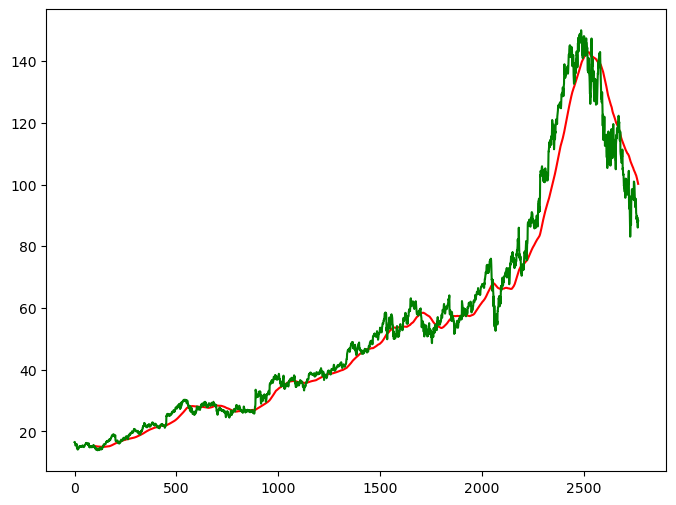

In [6]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show

In [7]:
ma_200_days=data.Close.rolling(200).mean()

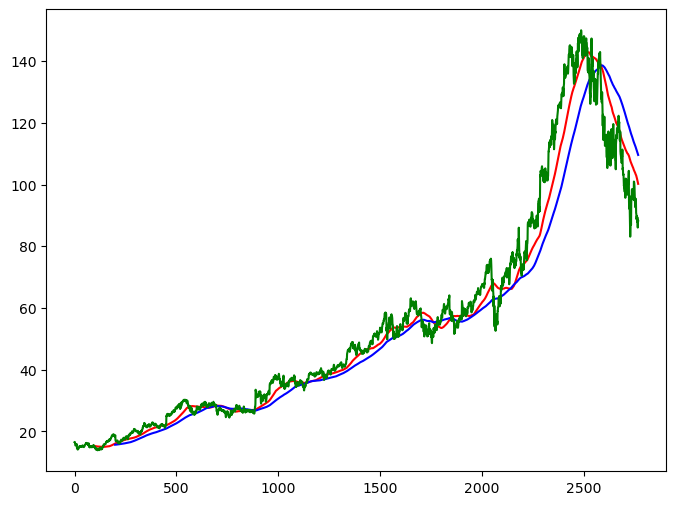

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [9]:
data.dropna(inplace=True)

In [10]:
data_train=pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test=pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [11]:
data_train.shape[0]

2214

In [12]:
data_test.shape[0]

554

In [13]:
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range=(0,1))

In [14]:
data_train_scale=Scaler.fit_transform(data_train)

In [15]:
x=[]
y=[]
for i in range(100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [17]:
x,y= np.array(x), np.array(y)

In [18]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [21]:
model = Sequential()
model.add(LSTM(units = 50,activation = 'relu', return_sequences = True,
               input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60,activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu',return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120,activation = 'relu'))
model.add(Dense(units = 1))

In [24]:
model.compile(optimizer = 'adam' , loss = 'mean_squared_error')

In [25]:
model.fit(x,y, epochs=50 ,batch_size=32, verbose=1)

Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 51s 428ms/step - loss: 0.0700
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 26s 395ms/step - loss: 0.0037
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 27s 406ms/step - loss: 0.0022
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 28s 421ms/step - loss: 0.0017
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 27s 406ms/step - loss: 0.0018
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 28s 410ms/step - loss: 0.0018
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 28s 422ms/step - loss: 0.0017
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 28s 422ms/step - loss: 0.0019
Epoch 9/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 28s 417ms/step - loss: 0.0013
Epoch 10/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 28s 413ms/step - loss: 0.0015
Epoch 11/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 27s 407ms/step - loss: 0.0014
Epoch 12/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 27s 398ms/step - loss: 0.0011
Epoch 13/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 27s 395ms/step - loss: 0.0012
Epoch 14/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 26s 390ms/step - loss: 0.0012
Epoch 15/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 28s 

In [26]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [27]:
pas_100_days=data_train.tail(100)

In [28]:
data_test=pd.concat([pas_100_days,data_test], ignore_index= True)

In [31]:
data_test_scale = Scaler.fit_transform(data_train)

In [33]:
x=[]
y=[]
for i in range(100,data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])

x,y= np.array(x), np.array(y)

In [34]:
y_predict= model.predict(x)

67/67 ━━━━━━━━━━━━━━━━━━━━ 15s 200ms/step


In [39]:
scale = 1/Scaler.scale_

In [40]:
y_predict = y_predict * scale

In [41]:
y = y * scale

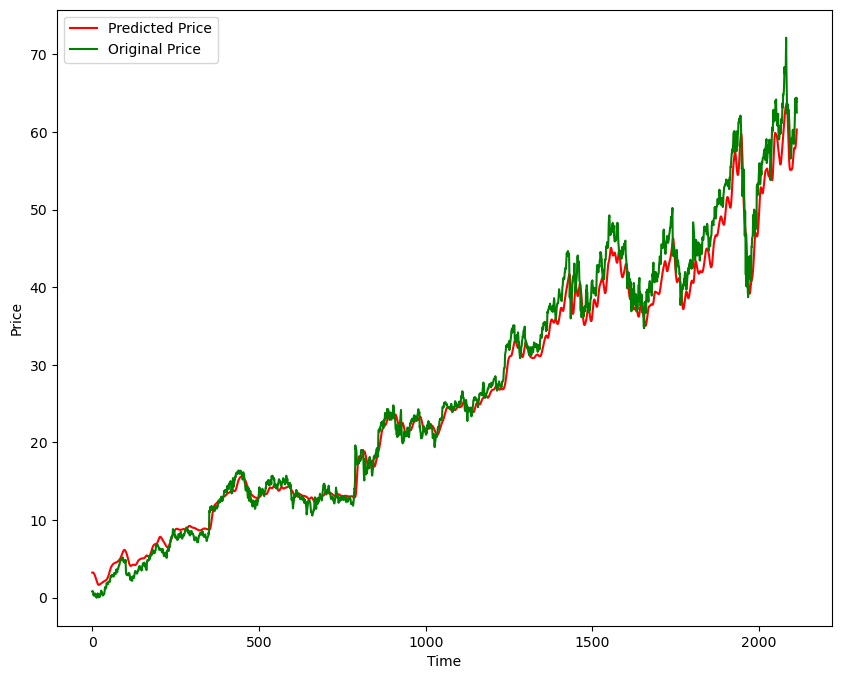

In [43]:
plt.figure(figsize = (10,8) )
plt.plot( y_predict, 'r' , label = 'Predicted Price')
plt.plot( y , 'g' , label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [45]:
model.save(' Stock Predictor Model.keras')